In [1]:
include("./Functions.jl")


Main.GPLM

In [2]:
using .GPLM


In [3]:
using Random


In [4]:
using Plots


In [8]:
using LinearAlgebra


In [6]:
using Distributions


┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1260


In [7]:
gr()

Plots.GRBackend()

In [9]:
k(x,x_)=(x[1]x_[1]+x[2]x_[2]+1)^2

k (generic function with 1 method)

In [10]:
Φ(x)=[x[1]^2 x[2]^2 (x[1] * x[2])*√2 x[1]*√2 x[2]*√2 1]

Φ (generic function with 1 method)

In [11]:
f(x)=[sin(x[1]) cos(x[2])]

f (generic function with 1 method)

In [12]:
n(x)=[0.1 0.05]
X,Y=GPLM.ToyData(f,2,2,min=0,max=π,messiness=n, N=100)

([2.465660162559655 2.437213125771887; 2.677279396030649 1.3491230691180152; … ; 1.7917689132354706 2.9004671250737415; 2.652740463782975 0.7356729010515628], [0.46052211024165673 -0.8357566486434194; 0.44470953576416283 0.19539070199841835; … ; 0.8677357371810563 -1.0068903832610976; 0.4952666539842743 0.802918857411744])

In [13]:
Y[1,:]

2-element Array{Float64,1}:
  0.46052211024165673
 -0.8357566486434194

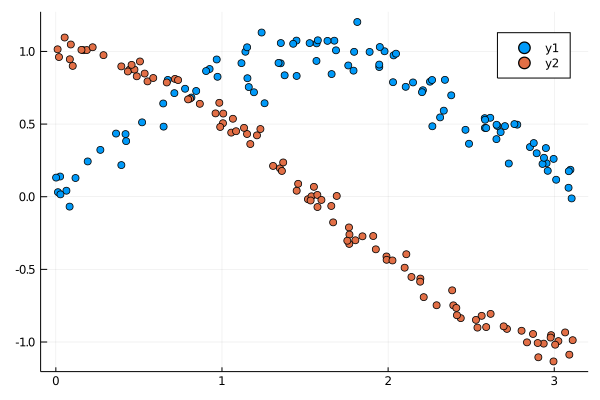

In [15]:
plot(X[:,1],Y[:,1],seriestype=:scatter)
plot!(X[:,2],Y[:,2],seriestype=:scatter)

In [16]:
K=zeros(size(Y,1),size(Y,1))
for i in 1:size(Y,1)
    for j in 1:i
        K[i,j]=K[j,i]
    end
    for j in i:size(Y,1)
        K[i,j]=(Φ(Y[i,:])Φ(Y[j,:])')[1]
    end
end

In [17]:
K

100×100 Array{Float64,2}:
 3.65028   1.08472   2.06558  2.88024  …   0.295396    5.02265   0.31029
 1.08472   1.52756   1.97417  2.13538      2.7477      1.41409   1.89649
 2.06558   1.97417   3.399    4.16769      3.59913     3.29095   2.07674
 2.88024   2.13538   4.16769  5.39148      3.59301     4.81153   1.93214
 4.45411   1.7516    3.92909  5.52688      1.52331     7.11919   0.851936
 4.85817   1.15133   2.58559  3.82251  …   0.201472    7.03053   0.198017
 0.863053  1.30849   1.45927  1.4778       2.1376      0.97334   1.64941
 1.87117   1.84441   3.02163  3.64064      3.25771     2.87242   1.96124
 0.96419   2.31183   3.41916  3.77456      6.35082     1.61463   3.58619
 4.90792   1.38652   3.18445  4.64225      0.554505    7.42983   0.37952
 5.17911   1.20022   2.80262  4.18348  …   0.219801    7.61806   0.196134
 0.495452  2.76368   3.88104  4.05509      9.65777     0.959015  5.25091
 0.483372  1.31797   1.25464  1.13174      2.63127     0.45744   2.02527
 ⋮                    

In [18]:
K_=zeros(size(Y,1),size(Y,1))
for i in 1:size(Y,1)
    for j in 1:size(Y,1)
        K_[i,j]=k(Y[i,:],Y[j,:])
    end
end

In [19]:
K_

100×100 Array{Float64,2}:
 3.65028   1.08472   2.06558  2.88024  …   0.295396    5.02265   0.31029
 1.08472   1.52756   1.97417  2.13538      2.7477      1.41409   1.89649
 2.06558   1.97417   3.399    4.16769      3.59913     3.29095   2.07674
 2.88024   2.13538   4.16769  5.39148      3.59301     4.81153   1.93214
 4.45411   1.7516    3.92909  5.52688      1.52331     7.11919   0.851936
 4.85817   1.15133   2.58559  3.82251  …   0.201472    7.03053   0.198017
 0.863053  1.30849   1.45927  1.4778       2.1376      0.97334   1.64941
 1.87117   1.84441   3.02163  3.64064      3.25771     2.87242   1.96124
 0.96419   2.31183   3.41916  3.77456      6.35082     1.61463   3.58619
 4.90792   1.38652   3.18445  4.64225      0.554505    7.42983   0.37952
 5.17911   1.20022   2.80262  4.18348  …   0.219801    7.61806   0.196134
 0.495452  2.76368   3.88104  4.05509      9.65777     0.959015  5.25091
 0.483372  1.31797   1.25464  1.13174      2.63127     0.45744   2.02527
 ⋮                    

In [20]:
G(x,x_,θ1,θ2)=θ1*exp(-(x-x_)*(x-x_)'/θ2)

G (generic function with 1 method)

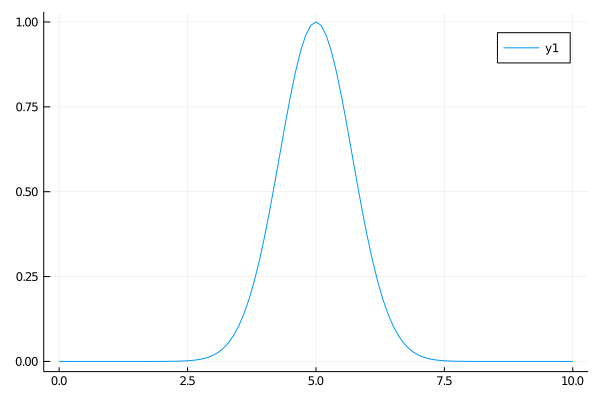

In [21]:
x=[i for i in 0:0.1:10]
x_=5
θ1=1
θ2=1
y=[G(i,x_,θ1,θ2) for i in x]
plot(x,y)

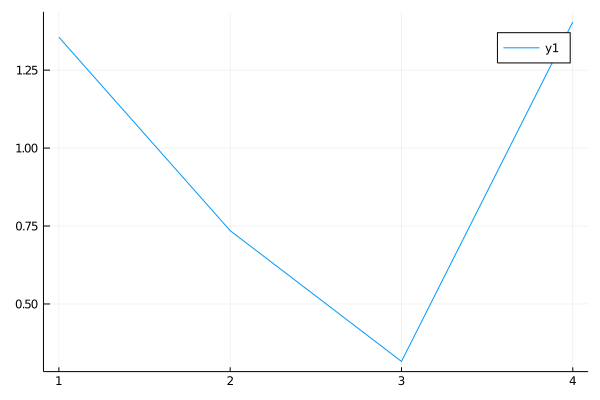

In [22]:
G(x,x_)=GPLM.GaussianKernel(x,x_,th1=1,th2=1)
x=[i for i in 1:1:4]
K=GPLM.KernelMatrix(x,G)
y=cholesky(K).L*randn(length(x))
plot(x,y)

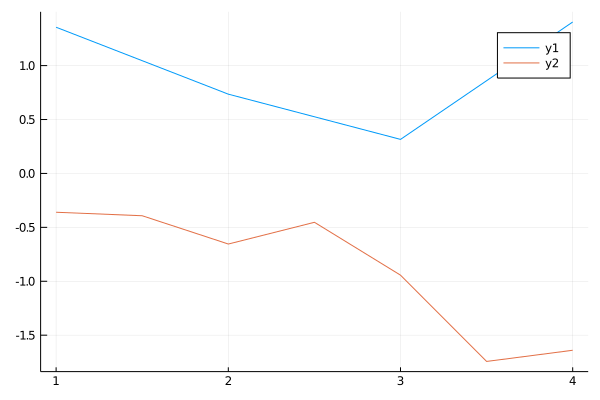

In [23]:
x=[i for i in 1:0.5:4]
K=GPLM.KernelMatrix(x,G)
y=cholesky(K).L*randn(length(x))
plot!(x,y)

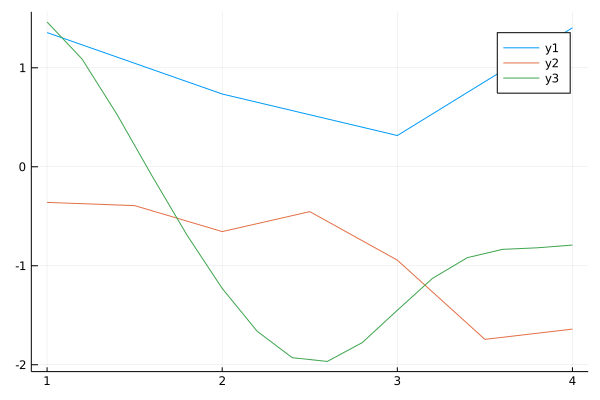

In [24]:
x=[i for i in 1:0.2:4]
K=GPLM.KernelMatrix(x,G)
y=cholesky(K).L*randn(length(x))
plot!(x,y)

In [25]:
X=vcat([[i i] for i in 1:0.2:4]...)
K=GPLM.KernelMatrix(X,G)


16×16 Array{Float64,2}:
 1.0       0.961558  0.863075  0.743376  …  0.500001  0.5       0.5
 0.961558  1.0       0.961558  0.863075     0.500005  0.500001  0.5
 0.863075  0.961558  1.0       0.961558     0.500031  0.500005  0.500001
 0.743376  0.863075  0.961558  1.0          0.500168  0.500031  0.500005
 0.639019  0.743376  0.863075  0.961558     0.500767  0.500168  0.500031
 0.567668  0.639019  0.743376  0.863075  …  0.502988  0.500767  0.500168
 0.528067  0.567668  0.639019  0.743376     0.509921  0.502988  0.500767
 0.509921  0.528067  0.567668  0.639019     0.528067  0.509921  0.502988
 0.502988  0.509921  0.528067  0.567668     0.567668  0.528067  0.509921
 0.500767  0.502988  0.509921  0.528067     0.639019  0.567668  0.528067
 0.500168  0.500767  0.502988  0.509921  …  0.743376  0.639019  0.567668
 0.500031  0.500168  0.500767  0.502988     0.863075  0.743376  0.639019
 0.500005  0.500031  0.500168  0.500767     0.961558  0.863075  0.743376
 0.500001  0.500005  0.500031  0.5001

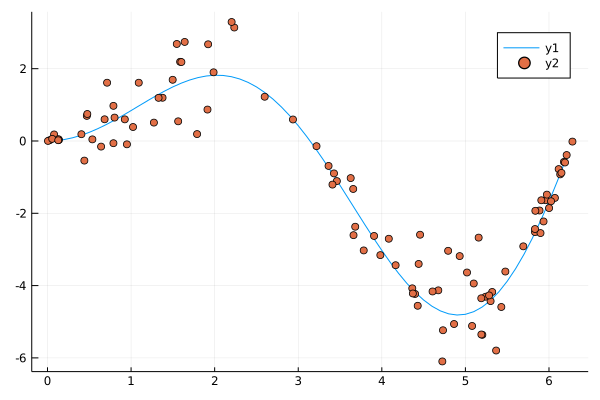

In [26]:
f(x)=x[1]*sin(x[1])
x=[i for i in 0:0.1:2π]
y=[f(i) for i in x]
n(x)=[sin(x[1])]
plot(x,y)
X,Y=GPLM.ToyData(f,1,1,min=0,max=2π,messiness=n,N=100)
plot!(X,Y,seriestype=:scatter)

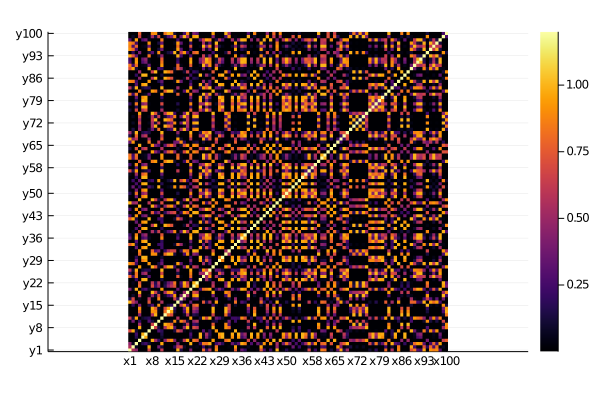

In [27]:
k(x,x_,)=GPLM.GaussianKernel(x,x_,;th1=1,th2=1)
K=GPLM.KernelMatrix(X,k,observationn_noise=0.2)
# heatmap(K)
xs = [string("x", i) for i = 1:100]
ys = [string("y", i) for i = 1:100]
heatmap(xs, ys, K, aspect_ratio=1)

In [28]:
yy=inv(K)*Y

100-element Array{Float64,1}:
 -1.1462260504849362
  0.6145787848534989
 -3.2028240299575916
 -3.9045292499121325
  0.853369798538527
 -1.7692846028412346
  0.6162090061194988
 -2.897990364818468
 -0.234241846069073
  4.535601417247501
  0.5483649815038818
 -0.05556776079335264
  2.1701985460847446
  ⋮
 -1.0774747324932064
 -1.9364781405325528
  2.70457161841224
 -4.604375132597676
 -3.500976593082458
 -6.197504952989056
 -1.9344560404921411
 -2.1020558562252147
  2.8684060679458145
 -3.1445163945443007
  2.594485658051769
 -3.91784320347969

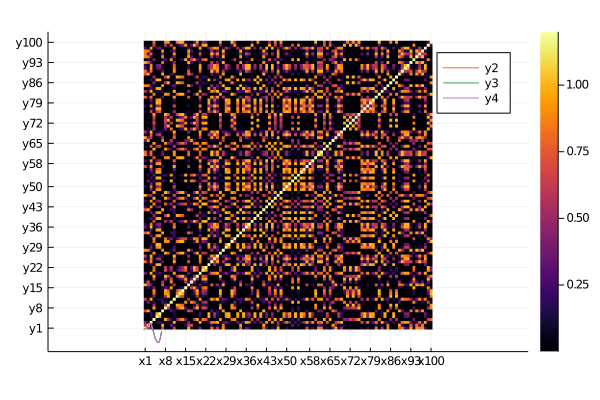

In [29]:
μ=[]
σ=[]
for i in 0:0.1:2π
    k_=[k(j,i) for j in X]
    s=k(i,i)
    mu=(k_'*yy)[1]
    var=s-(k_'*inv(K)*k_)[1]
    push!(μ,mu)
    push!(σ,var)
end
plot!(0:0.1:2π,μ)
plot!(0:0.1:2π,μ+σ)
plot!(0:0.1:2π,μ-σ)

In [30]:
σ

63-element Array{Any,1}:
 0.03550421022015027
 0.02317785072228218
 0.01882040270711627
 0.018058959088165905
 0.01802035107491795
 0.01752485078620114
 0.01666935804196712
 0.016097077255078585
 0.01631800803194383
 0.017345982395743365
 0.018723465961429486
 0.01981801664263827
 0.020176837988859386
 ⋮
 0.012802072527884678
 0.012711367903824877
 0.013443469951334386
 0.014786731067127468
 0.016168778819600993
 0.01687656176837804
 0.016372679939545165
 0.014606230980410584
 0.012255953014208454
 0.010885656271236499
 0.01299292337422453
 0.021895084523960384

In [31]:
(μ,σ,K,K_,yy)=GPLM.GaussianProcessRegression(X,Y,k,x_test=[i for i in 0:0.1:2π],observationn_noise=0.01)

(Any[0.010377070327677984, 0.0599323942808212, 0.11160750261166186, 0.1647188020247654, 0.22037983076825185, 0.28131187252097334, 0.3511254578655212, 0.4332620873153701, 0.5299259503066196, 0.6413740834676105  …  -4.386194042484931, -4.229315962697598, -3.9767893117254687, -3.6259873033246777, -3.185575507427245, -2.674996103377822, -2.1219895286309622, -1.558709147603082, -1.0172650899586557, -0.5255948167502282], Any[0.002787387901749483, 0.0012746524567259776, 0.001386879596311008, 0.0016032782265714696, 0.0015156729483297715, 0.0012538449999157653, 0.0010347960777316034, 0.0009628025232986115, 0.00102664091352489, 0.0011656639271830915  …  0.0008333394943984551, 0.0010343571254167738, 0.0012264772097529963, 0.001287564288849019, 0.001181549835950868, 0.000981551975821393, 0.000795899572145653, 0.0006852410193620706, 0.0007382727756229945, 0.0014206374300614888], [1.01 0.5579936118179171 … 0.0034574477329940493 3.5767053726696664e-6; 0.5579936118179171 1.01 … 0.07324216457602643 0.0

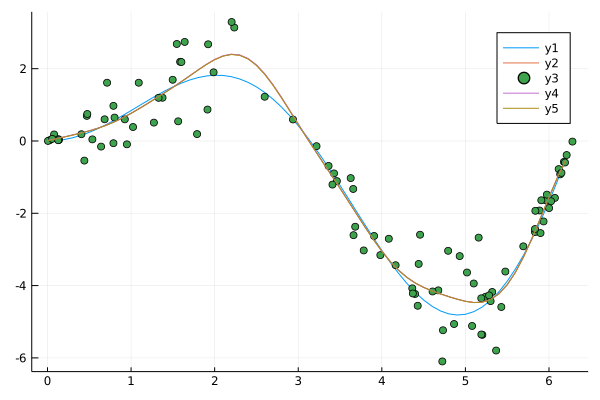

In [32]:
x_test=[i for i in 0:0.1:2π]
x=[i for i in 0:0.1:2π]
y=[f(i) for i in x]
plot(x,y)
plot!(x_test,μ)
plot!(X,Y,seriestype=:scatter)
plot!(x_test,μ+2 .*σ)
plot!(x_test,μ-2 .*σ)


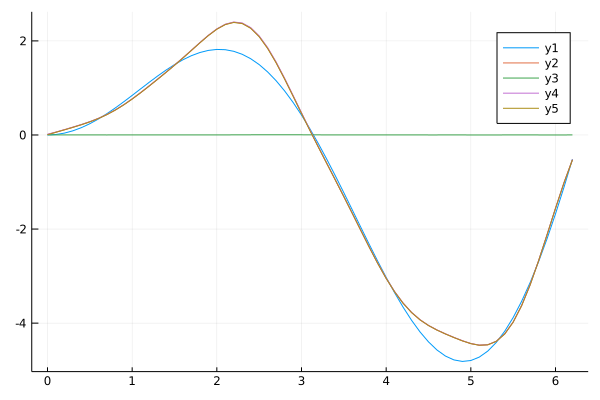

In [33]:
plot(x,y)
plot!(x_test,μ)
plot!(x_test,σ)
plot!(x_test,μ+2 .*σ)
plot!(x_test,μ-2 .*σ)